In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from scipy.signal import find_peaks


# import lightkurve as lk
# from scipy.optimize import curve_fit

# from astropy.convolution import Gaussian1DKernel
# from astropy.convolution import convolve
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

Index 258 is a good tester. Clear rotational signal, ambiguous peak mode.

In [3]:
j = janet.boot(uni, index=24)

Already have data downloaded for Gaia ID 3296334520042680064.
If you want to check for new data, run `janet.update()`.
No postcard object will be created for this target.
### Running Simple Astropy Lomb-Scargle on Sector 5 on star 3296334520042680064 ###
### Completed Simple Astropy Lomb-Scargle for Sector 5 on star 3296334520042680064 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 32 on star 3296334520042680064 ###
### Completed Simple Astropy Lomb-Scargle for Sector 32 on star 3296334520042680064 ###
### Saved results ###
### Running Wavelet Estimation on star 3296334520042680064 ###


/Users/Anaconda/anaconda3/envs/michael/lib/python3.8/site-packages/jazz_hands-0.0.3-py3.8.egg/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

### Completed Wavelet Estimation on star 3296334520042680064 ###
### Saved results ###
### Running ACF Estimation on star 3296334520042680064 ###
### Completed ACF Estimation on star 3296334520042680064 ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


/Users/oliver hall/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/oliver hall/Research/michael/Examples/../michael/plotting.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'{j.output_path}/{j.gaiaid}/output.pdf', rasterized=True)



------ Decoding Overall Period Flag 1 ------
1: Best rotation is from the Simple Lomb Scargle (SLS) method.

No other flags raised. 

### Saved results ###


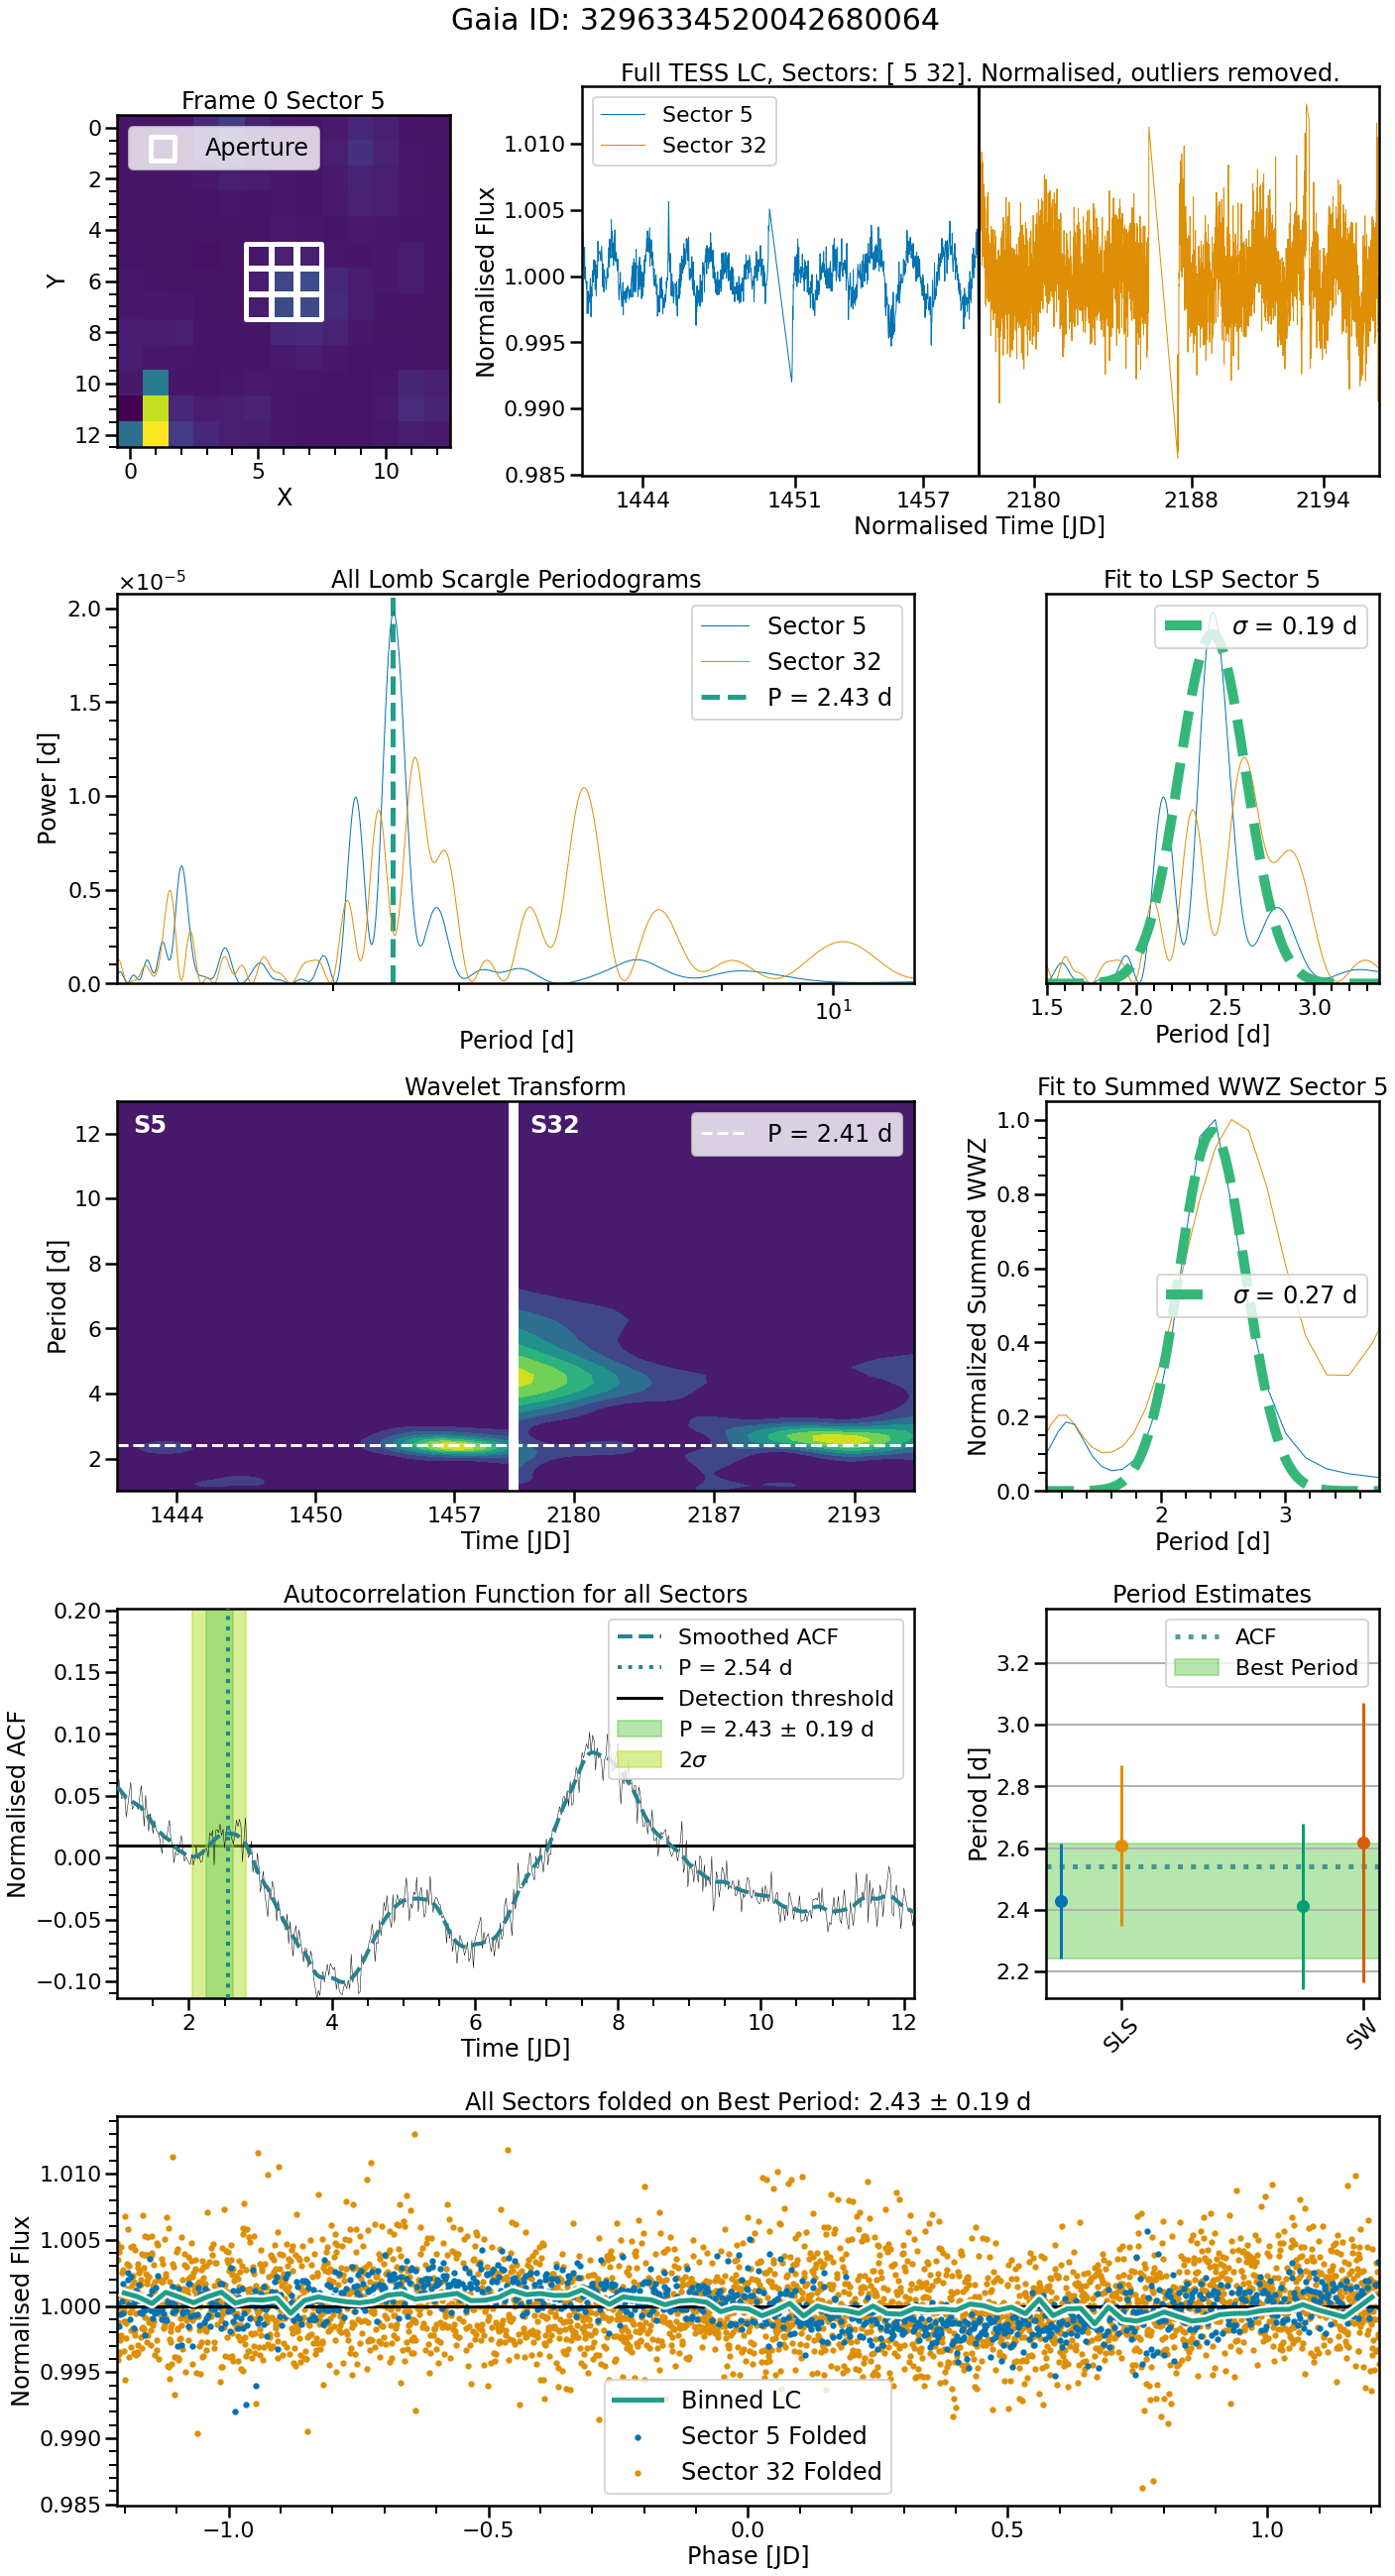

In [4]:
j.run(period_range = (1., 13.))

Adding new features

In [5]:
list(j.void)

['datum_5',
 'clc_5',
 'datum_32',
 'clc_32',
 'clc_all',
 'pg_5',
 'p_5',
 'P_5',
 'popt_5',
 'pg_32',
 'p_32',
 'P_32',
 'popt_32',
 '5_wt',
 '5_wwz',
 '5_wwa',
 '5_wavelet_popt',
 '32_wt',
 '32_wwz',
 '32_wwa',
 '32_wavelet_popt',
 'acflc',
 'vizacf',
 'acfsmoo',
 'peaks']

In [30]:
x

array([13.        , 12.3370071 , 11.70782647, 11.11073371, 10.54409235,
       10.0063494 ,  9.49603104,  9.01173864,  8.55214489,  8.11599017,
        7.7020791 ,  7.30927727,  6.93650811,  6.58274999,  6.24703333,
        5.92843804,  5.62609094,  5.33916337,  5.06686895,  4.8084614 ,
        4.56323249,  4.33051013,  4.10965647,  3.90006624,  3.70116499,
        3.51240759,  3.33327672,  3.16328143,  3.0019558 ,  2.84885769,
        2.70356751,  2.56568704,  2.4348384 ,  2.31066297,  2.19282042,
        2.08098778,  1.97485854,  1.87414183,  1.77856162,  1.68785595,
        1.60177621,  1.5200865 ,  1.44256292,  1.368993  ,  1.2991751 ,
        1.23291788,  1.17003974,  1.11036835,  1.05374017,  1.        ])

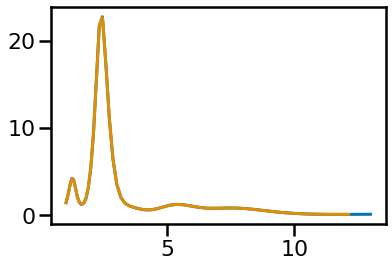

In [54]:
from scipy import interpolate

w = np.flip(np.sum(j.void['5_wwz'], axis=1))
x = np.flip(1./j.void['5_wt'].nus)

f = interpolate.interp1d(x, w)

xnew = j.void['vizacf'].time.value
wnew = f(xnew)

plt.plot(x, w)
plt.plot(xnew, wnew)

In [62]:
acfsmoo = j.void['acfsmoo']
compacf = (smooacf * (wnew/wnew.max()))

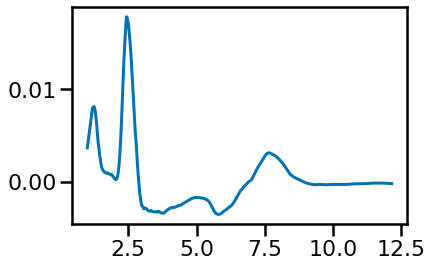

In [70]:
plt.plot(vizacf.time.value, compacf)

In [38]:
xnew.max()

12.146135720226766

In [37]:
x.max()

13.0

Now we smooth following the acf's time array

ValueError: x and y must have same first dimension, but have shapes (50,) and (100,)

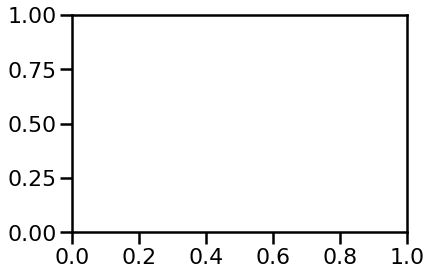

In [16]:
wwz = j.void[f'{j.sectors[0]}_wwz']
max = np.nanmax(wwz)
wwz /= max
for s in j.sectors[1:]:
    add = j.void[f'{s}_wwz']/max
    wwz = np.vstack((wwz, add[:, :wwz.shape[1]]))
w = np.sum(wwz, axis=1)
nus = j.void['5_wt'].nus
p = 1/nus
plt.plot(p, w)

In [ ]:
pacf = j.void['']

In [ ]:
acfsmoolc = lk.LightCurve(time = j.void['acflc'].time.value, flux = acfsmoo)

In [ ]:
Model = pm.Model()
P = acfsmoolc.time.value
F = acfsmoolc.flux.value

with Model:
    A0 = pm.Uniform('A0', 0., 1., testval=0.05)
    A1 = pm.Uniform('A1', 0., 10., testval=0.5)
    yy = pm.Deterministic('yy', (1-A0)*np.exp(-P/A1) + A0)
    y = pm.Normal('like', mu=yy, sigma = np.std(F),
                 observed=F)

In [ ]:
with Model:
    trace = pm.sample()

In [ ]:
yy = np.median(trace['yy'], axis=0)
normacf = acfsmoolc - yy

In [ ]:
binned = normacf.bin()

In [ ]:
fig, ax= plt.subplots()
ax.legend()